# Hackathon Santander  Data Challenge.


* Autores: Diego Santos, Laís Moraes, Luiz Torres, Steffany Soares, Vitória Bernardes
* Organizadora do evento: Shawee



 * Objetivo. 
     - Análise dos impactos econômicos mundiais causados pela COVID- 19 e identificação dos setores mais afetados. 


# 1- Sumário   

* 1- Importando as bibliotecas.
* 2 - Carregando os dados.
* 3 - Analisando os dados.
* 4-  Visualizandos os dados.
* 5 - Apredizagem de Máquina
* 6 -Conclusão 
* 7 Referências.



# 1 - Importando as bibliotecas.

In [36]:
# Manipulação de dados 
import numpy as np 
import pandas as pd 
import random as rnd 

#Visualização de dados 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.cbook as cbook
from plotly.graph_objs import *
import plotly.offline as py
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px 

#Machine Learning 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 2 - Carregando os dados. 

In [54]:
df = pd.read_csv('economia.csv')
df_train = pd.read_csv('train_covid.csv')

# 3 - Analisando os dados.

In [9]:
#selecionando os cinco primeira linhas 
df.head()

,Economy,ADB Country Code,Sector,Country 2018 GDP,Scenario,as % of total GDP,in $ Mn,Employment (in 000),as % of sector GDP,as % of sector employment
0,Australia,AUS,"Agriculture, Mining and Quarrying",1433904.349,"Shorter containment, smaller demand shock",-0.33,"4,671.70",18,-2.70,-2.65
1,Australia,AUS,"Business, Trade, Personal, and Public Services",1433904.349,"Shorter containment, smaller demand shock",-1.41,"20,147.01",191,-2.31,-2.29
2,Australia,AUS,Hotel and restaurants and Other Personal Services,1433904.349,"Shorter containment, smaller demand shock",-0.35,"5,023.10",112,-6.70,-7.24
3,Australia,AUS,"Light/Heavy Manufacturing, Utilities, and Cons...",1433904.349,"Shorter containment, smaller demand shock",-0.39,"5,660.89",54,-2.31,-2.29
4,Australia,AUS,Transport services,1433904.349,"Shorter containment, smaller demand shock",-0.30,"4,307.48",47,-6.47,-7.22


In [43]:
# obtendo quantidade, média, desvio padrão, valor minimo, valor maximo porcentagem das coluna "Country 2018 GDP 
df.describe()

,Country 2018 GDP
count,1.576000e+03
mean,1.227601e+06
std,3.105474e+06
min,2.534965e+03
25%,6.097170e+04
50%,3.309103e+05
75%,1.042173e+06
max,2.054434e+07


In [13]:
# obtendo informação da base de  dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 10 columns):
Economy                      1576 non-null object
ADB Country Code             1576 non-null object
Sector                       1576 non-null object
Country 2018 GDP             1576 non-null float64
Scenario                     1576 non-null object
as % of total GDP            1576 non-null object
 in $ Mn                     1576 non-null object
Employment (in 000)          1576 non-null object
as % of sector GDP           1576 non-null object
as % of sector employment    1576 non-null object
dtypes: float64(1), object(9)
memory usage: 123.2+ KB


In [14]:
# indexacao do dataframe 
df.index

RangeIndex(start=0, stop=1576, step=1)

In [22]:
# definir a  coluna com indice
df.set_index('Employment (in 000)', inplace= True)
df.head(12)

,Economy,ADB Country Code,Country 2018 GDP,Scenario,as % of total GDP,in $ Mn,as % of sector GDP,as % of sector employment
Employment (in 000),,,,,,,,
18,Australia,AUS,1433904.349,"Shorter containment, smaller demand shock",-0.33,"4,671.70",-2.70,-2.65
191,Australia,AUS,1433904.349,"Shorter containment, smaller demand shock",-1.41,"20,147.01",-2.31,-2.29
112,Australia,AUS,1433904.349,"Shorter containment, smaller demand shock",-0.35,"5,023.10",-6.70,-7.24
54,Australia,AUS,1433904.349,"Shorter containment, smaller demand shock",-0.39,"5,660.89",-2.31,-2.29
47,Australia,AUS,1433904.349,"Shorter containment, smaller demand shock",-0.30,"4,307.48",-6.47,-7.22
422,Australia,AUS,1433904.349,"Shorter containment, smaller demand shock",-2.78,"39,810.18",-2.78,-3.11
6,Austria,AUT,455285.818,"Shorter containment, smaller demand shock",-0.03,147.80,-2.10,-1.99
55,Austria,AUT,455285.818,"Shorter containment, smaller demand shock",-1.12,"5,112.21",-2.05,-2.01
33,Austria,AUT,455285.818,"Shorter containment, smaller demand shock",-0.56,"2,547.44",-5.06,-5.08


In [16]:
# verificando as colunas e seus valores 
df.columns

Index([u'Economy', u'ADB Country Code', u'Country 2018 GDP', u'Scenario',
       u'as % of total GDP', u' in $ Mn ', u'Employment (in 000)',
       u'as % of sector GDP', u'as % of sector employment'],
      dtype='object')

In [26]:
# valores 
df.values

array([['Australia', 'AUS', 'Agriculture, Mining and Quarrying', ...,
        '18', '-2.70', '-2.65'],
       ['Australia', 'AUS',
        'Business, Trade, Personal, and Public Services', ..., '191',
        '-2.31', '-2.29'],
       ['Australia', 'AUS',
        'Hotel and restaurants and Other Personal Services', ..., '112',
        '-6.70', '-7.24'],
       ...,
       ['Cambodia', 'CAM', 'Longer containment, larger demand shock',
        ..., 'na', '-7.43', 'na'],
       ['Singapore', 'SIN', 'Longer containment, larger demand shock',
        ..., 'na', '-2.61', 'na'],
       ['Hong Kong, China', 'HKG',
        'Longer containment, larger demand shock', ..., 'na', '-2.74',
        'na']], dtype=object)

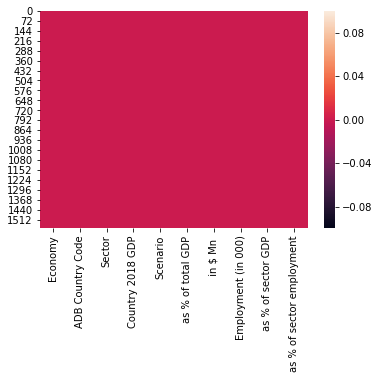

In [41]:
# valores das tabelas 
sns.heatmap(df.isnull())

# 4 - Visualizando os dados 

In [50]:
# Porcentagem dos setores mais afetados 
df = pd.read_csv('economia.csv')

fig = px.line(df, x = 'Economy', y = 'as % of sector GDP', title='A economia  de países mais afetados pelo Covid-19 em, 2020')
fig.show()

In [12]:
#comparando a porcentagem de setores  afetados pelos Covid-19 em 2020.
df = pd.read_csv('economia.csv')

fig = px.line(df, x = 'as % of sector GDP', y = 'Sector', title='Os setores dos  países mais afetados pelo Covid 19, em 2020')
fig.show()

In [23]:
layout = go.Layout(title='A empresa lançou ou passou a comercializar novos produtos ou serviços',
                   yaxis={'title':'Percentual para cada Região'},
                  )
# Criando gráfico com marcadores e linhas
bits = go.Scatter(x = ["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"],
                    y = [20.5,4.9,13.4,18.6,8.3],
                    mode = 'markers+lines',
                    name = 'Marcadores e Linhas')
data = [bits]
# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)
# Exibindo figura/gráfico
py.iplot(fig)

In [48]:
layout = go.Layout(title='A empresa lançou ou passou a comercializar novos produtos ou serviços',
                   yaxis={'title':'Percentual para cada Atividade '},
                  )
# Criando gráfico com marcadores e linhas
bits = go.Scatter(x = ["Indústria","Construção","Comércio","Comércio Varejista","Comércio por atacado","Comércio de veículos, peças e motocicletas ","Serviços","Serviços prestados às famílias ","Serviços de informação e comunicação ","Serviços profissionais, administrativos e complementares ","Transportes, serviços auxiliares aos transportes e correio ","Outros serviços"],
                    y = [15.1,14.1,16.9,20.1,12.4,5.6,9.9,10.6,18.8,9.7,2.2,10.0],
                    mode = 'markers+lines',
                    name = 'Marcadores e Linhas')
data = [bits]
# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)
# Exibindo figura/gráfico
py.iplot(fig)

In [ ]:
sns.barplot(x="", y="Survived", hue="Sex", data=data_train);

# 5- Aprendizagem de Máquina.

In [71]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Economy', 'ADB Country Code', 'Sector', 'Country 2018 GDP', 'Scenario', 'as % of total GDP']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
df_train, df = encode_features(df_train, df)
df_train.head(5)

,Economy,ADB Country Code,Sector,Country 2018 GDP,Scenario,as % of total GDP,in $ Mn,Employment (in 000),as % of sector GDP,as % of sector employment
0,0,0,0,49,3,32,"4,671.70",18,-2.70,-2.65
1,0,0,1,49,3,132,"20,147.01",191,-2.31,-2.29
2,0,0,2,49,3,34,"5,023.10",112,-6.70,-7.24
3,0,0,3,49,3,38,"5,660.89",54,-2.31,-2.29
4,0,0,6,49,3,29,"4,307.48",47,-6.47,-7.22


In [110]:
from sklearn.model_selection import train_test_split

X_all = df_train.drop(['Country 2018 GDP', 'as % of total GDP'], axis=1)
y_all = df_train['as % of total GDP']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

# Conclusão.

      As análises efetuadas demonstram que o Brasil foi significativamente afetado pela covid-19. No segmento da economia houve uma queda de 6% do PIB até o último levantamento e, internamente dessa índice, essa queda reflete diretamente no setor de serviços voltados para alojamentos e restaurantes, o qual demonstrou uma retração de 45%.Segundo pesquisa do SEBRAE, um dos maiores custos de empreendimentos deste setor são referentes aos alugueis de estabelecimentos. Este segmento é composto, majoritariamente,por empresas de até 49 empregados.Propomos uma solução que auxilie na desoneração do custo de locação, juntamente com o incentivo de empresas do setor que consideram seu crescimento limitado por fatores estruturais, tais como: espaços físicos e equipamentos.

# Referências:

* [1]Data ADB.Disponível em:<https://data.adb.org/dataset/covid-19-economic-impact-assessment-template>. Acesso, 1 Agosto, 2020.

* [2]Numpy. Disponível em<https://numpy.org/>.Acesso, 2 Agosto, 2020.

* [3] Pandas.Disponível em: <https://pandas.pydata.org/>.Acesso, 2 Agosto, 2020.

* [4]Plotly.Disponível em <https://plotly.com/>. Acesso,2 Agosto, 2020.

* [5] IBGE. Disponível em:<https://www.ibge.gov.br/estatisticas/economicas/servicos/9229-pesquisa-mensal-de-servicos.html?=&t=series-historicas&utm_source=covid19&utm_medium=hotsite&utm_campaign=covid_19>.Acesso 2 Agosto, 2020.

In [ ]:
* [6].Disponível em:<>.Acesso 2 Agosto , 2020.